# Recommender System - Collaborative Filtering

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the necessary dataset

fruit_rating = pd.read_csv('C:/Users/ariji/OneDrive/Desktop/Data science & ML/Unsupervised Machine Learning/Data/fruit_ratings.csv')
fruit_rating

,User,Fruit,Rating
0,user0,Lemon,4.3
1,user1,Lemon,4.6
2,user2,Lemon,4.2
3,user3,Lemon,4.4
4,user4,Lemon,4.1
...,...,...,...
174,user25,Mango,4.9
175,user26,Mango,4.4
176,user27,Mango,4.3
177,user28,Mango,4.2


In [ ]:
### a. Data preparation - User Item Matrix

In [6]:
# restructure the data into a user-item matrix

X = (fruit_rating.pivot(index='User' , columns='Fruit' , values='Rating'))
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [12]:
# idntify NaN values

X[X.isna().any(axis=1)]

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user19,3.5,4.8,NaN,3.1,3.4,3.2


In [14]:
# ratings range

fruit_rating.describe()

,Rating
count,179.000000
mean,3.147486
std,1.465610
min,1.000000
25%,1.650000
50%,3.400000
75%,4.600000
max,5.000000


In [15]:
# range of Lime rating

X.Lime.describe()

count    29.000000
mean      2.937931
std       1.636724
min       1.000000
25%       1.200000
50%       3.100000
75%       4.600000
max       4.900000
Name: Lime, dtype: float64

In [17]:
# updated user-item matrix with nan values as numeric values
X = (fruit_rating.pivot(index='User', columns='Fruit', values='Rating').fillna(3))
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


### b. Modelling truncated SVD

In [18]:
# import truncated svd from sklearn
from sklearn.decomposition import TruncatedSVD

In [19]:
# apply SVD to the ratings

svd = TruncatedSVD(n_components=2)
svd.fit(X)

TruncatedSVD()

In [20]:
# view the U matrix
U = svd.transform(X)

# alternative
U = svd.fit_transform(X)

U_df = pd.DataFrame(U, index=X.index)
U_df.head()

,0,1
User,,
user0,7.473496,4.062791
user1,7.491190,3.972463
user10,8.330967,0.158395
user11,7.725274,0.926172
user12,8.366775,-1.396251


In [21]:
# view the shape of the U matrix (users x latent features)
U_df.shape

(30, 2)

In [23]:
# view the sigma matrix

sigma = svd.singular_values_
sigma

array([42.3738503, 17.6542247])

In [26]:
# show each row of the array on one line
import numpy as np

# set linewidth to a large value to prevent wrapping
np.set_printoptions(linewidth=np.inf)

In [29]:
# view the VT matrix

VT = svd.components_

VT_df = pd.DataFrame(VT , columns=X.columns)
VT_df

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,0.422823,0.376398,0.378344,0.381959,0.44026,0.443486
1,-0.468373,0.419367,0.467655,-0.426644,-0.28962,0.346628


In [30]:
# view the shape of the VT_df matrix

VT_df.shape

(2, 6)

### c. Tuning - Choosing the number of components

In [31]:
# view the original data set
X.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [32]:
# view the shape of the original data set
X.shape

(30, 6)

### Model 1 : SVD with 2 components

In [33]:
# view the U matrix
U_df.head()

,0,1
User,,
user0,7.473496,4.062791
user1,7.491190,3.972463
user10,8.330967,0.158395
user11,7.725274,0.926172
user12,8.366775,-1.396251


In [34]:
# view the shape of the U matrix
U_df.shape

(30, 2)

In [35]:
# view the explained variance ratios

svd.explained_variance_ratio_

array([0.01114043, 0.83500665])

In [36]:
# total explained variance

sum(svd.explained_variance_ratio_)

0.8461470788660226

### Model 2 : SVD with 6 components

In [37]:
# try SVD with all 6 components
svd6 = TruncatedSVD(n_components=6)
U6 = svd6.fit_transform(X)

In [38]:
# view the U6 matrix
U6_df = pd.DataFrame(U6, index=X.index)
U6_df.head()

,0,1,2,3,4,5
User,,,,,,
user0,7.473496,4.062791,0.069101,-0.252455,-0.363006,0.017474
user1,7.491190,3.972463,0.069951,-0.213452,0.200745,-0.029323
user10,8.330967,0.158395,-1.456494,1.829248,0.024443,0.363001
user11,7.725274,0.926172,1.780361,0.514856,0.997471,-0.492574
user12,8.366775,-1.396251,-2.265663,-0.059205,0.303751,-0.829798


In [39]:
# view the shape of the U matrix
U6_df.shape

(30, 6)

In [40]:
# view the explained variance ratios
svd6.explained_variance_ratio_.round(2)

array([0.01, 0.84, 0.08, 0.05, 0.01, 0.01])

In [41]:
# view the cumulative explained variance ratio
import numpy as np

np.cumsum(svd6.explained_variance_ratio_).round(2)

array([0.01, 0.85, 0.93, 0.98, 0.99, 1.  ])

In [42]:
# prep the data for line plot
cum_evr6 = list(zip(range(1, U6.shape[1] + 1), np.cumsum(svd6.explained_variance_ratio_))) # hits 80% at 2 components
cum_evr6

[(1, 0.011140426986469578),
 (2, 0.8461470788660226),
 (3, 0.9263972581039884),
 (4, 0.9759333027137889),
 (5, 0.9903851759902448),
 (6, 1.0000000000000002)]

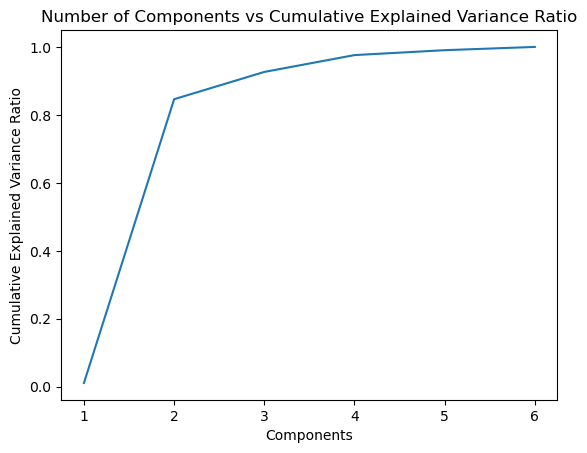

In [43]:
# 80%+ of the variance is captured at 2 components --> choose a 2 component model
cum_evr6_df = pd.DataFrame(cum_evr6).set_index(0)
cum_evr6_df.plot(title='Number of Components vs Cumulative Explained Variance Ratio',
                xlabel='Components',
                ylabel='Cumulative Explained Variance Ratio',
                legend=False);

### d. Recommending : Making recommendation

#### Step1 : Select a final model

In [44]:
# let's say we settled on the 2 component model
svd = TruncatedSVD(n_components=2)
U = svd.fit_transform(X)

In [45]:
# calculate the total explained variance
sum(svd.explained_variance_ratio_)

0.8461470788660231

#### step2 : Introduce a new user

In [46]:
# this new user has rated 2 out of 6 fruits
new_user = np.array([np.NaN, 2, np.NaN, 5, np.NaN, np.NaN])
new_user

array([nan,  2., nan,  5., nan, nan])

In [47]:
# view the new user's ratings as a dataframe
new_user_6d = pd.DataFrame([new_user], columns=X.columns)
new_user_6d

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,NaN,2.0,NaN,5.0,NaN,NaN


In [48]:
# transform the new user into a 2d space using our SVD model
new_user_2d = svd.transform(new_user_6d.fillna(3))
new_user_2d

array([[ 7.71732809, -1.1256194 ]])

#### step3 : Generate recommendation

In [49]:
# our new user
new_user_2d

array([[ 7.71732809, -1.1256194 ]])

In [50]:
# it's a 1x2 matrix
new_user_2d.shape

(1, 2)

In [51]:
# our VT matrix
svd.components_

array([[ 0.42282328,  0.37639792,  0.37834394,  0.38195861,  0.44026026,  0.44348558],
       [-0.46837309,  0.41936738,  0.46765486, -0.42664448, -0.28962047,  0.34662812]])

In [52]:
# it's a 2x6 matrix
svd.components_.shape

(2, 6)

In [53]:
# we want the output to be a 1x6 matrix to see all of their predicted ratings
new_user_recs = np.dot(new_user_2d, svd.components_)
new_user_recs

array([[3.79027584, 2.43273821, 2.39340291, 3.4279392 , 3.72363531, 3.03235241]])

In [54]:
# it's a 1x6 matrix
new_user_recs.shape

(1, 6)

In [55]:
# view the recommendations
recs = pd.DataFrame(new_user_recs, columns=X.columns)
recs

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,3.790276,2.432738,2.393403,3.427939,3.723635,3.032352


In [56]:
# sorted recommendations
top_recs = recs.T.sort_values(0, ascending=False)
top_recs.index.name = None
top_recs.columns = ['Recs']
top_recs

,Recs
Banana,3.790276
Peach,3.723635
Mango,3.427939
Pineapple,3.032352
Lemon,2.432738
Lime,2.393403


In [57]:
# identify the already rated fruits
already_rated = new_user_6d.T.dropna().index
already_rated

Index(['Lemon', 'Mango'], dtype='object', name='Fruit')

In [59]:
# exclude the already rated fruits
top_recs[~top_recs.index.isin(already_rated)]

,Recs
Banana,3.790276
Peach,3.723635
Pineapple,3.032352
Lime,2.393403
